# Tesla stock price prediction using Facebook Prophet

# Importing libraries

In [1]:
import pandas as pd
from fbprophet import Prophet
import plotly.express as px

In [3]:
# Initialzing plotly
import plotly.io as pio
pio.renderers.default='colab'

# Importing datasets and exploring it

In [5]:
df = pd.read_csv('/content/TSLA.csv')

In [30]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-27,287.000000,309.588013,282.600006,307.920013,307.920013,80243500
1,2020-07-28,300.799988,312.940002,294.884003,295.298004,295.298004,79043500
2,2020-07-29,300.200012,306.962006,297.399994,299.821991,299.821991,47134500
3,2020-07-30,297.600006,302.648010,294.200012,297.497986,297.497986,38105000
4,2020-07-31,303.000000,303.410004,284.196014,286.152008,286.152008,61041000
...,...,...,...,...,...,...,...
248,2021-07-21,659.609985,664.859985,650.289978,655.289978,655.289978,13953300
249,2021-07-22,656.440002,662.169983,644.599976,649.260010,649.260010,15105700
250,2021-07-23,646.359985,648.799988,637.299988,643.380005,643.380005,14581300
251,2021-07-26,650.969971,668.200012,647.109985,657.619995,657.619995,25044100


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,590.001099,603.131873,575.144095,590.114857,590.114857,4.258578e+07
std,154.433015,156.077155,151.697989,153.971884,153.971884,2.618046e+07
min,279.200012,284.000000,273.000000,274.877991,274.877991,1.395330e+07
25%,438.440002,447.000000,424.510010,434.000000,434.000000,2.539140e+07
50%,620.130005,632.500000,603.049988,623.309998,623.309998,3.382360e+07
75%,687.000000,700.700012,670.320007,684.900024,684.900024,4.964990e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,2.221262e+08


# Data visualization using plotly express

In [10]:
# analysing price and volume -- line,area,box plot

px.area(df, x= 'Date', y= 'Close') # area graph

In [11]:
# by line graph
px.line(df, x= 'Date', y= 'Close')

In [12]:
# analysing volume
px.area(df, x= 'Date', y= 'Volume')

In [13]:
# bar graph for volume
px.bar(df, y='Volume')

In [14]:
# box plot for analysing price of tesla
px.box(df, y='Close')

# Data preparation and modelling

***Data preparation***

In [15]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-27,287.000000,309.588013,282.600006,307.920013,307.920013,80243500
1,2020-07-28,300.799988,312.940002,294.884003,295.298004,295.298004,79043500
2,2020-07-29,300.200012,306.962006,297.399994,299.821991,299.821991,47134500
3,2020-07-30,297.600006,302.648010,294.200012,297.497986,297.497986,38105000
4,2020-07-31,303.000000,303.410004,284.196014,286.152008,286.152008,61041000


In [18]:
ndf = pd.DataFrame(df, columns=['Date', 'Close'])

In [19]:
ndf.head()

,Date,Close
0,2020-07-27,307.920013
1,2020-07-28,295.298004
2,2020-07-29,299.821991
3,2020-07-30,297.497986
4,2020-07-31,286.152008


In [20]:
prophet_df = ndf.rename(columns= {'Date':'ds', 'Close':'y'})

In [21]:
prophet_df.head()

,ds,y
0,2020-07-27,307.920013
1,2020-07-28,295.298004
2,2020-07-29,299.821991
3,2020-07-30,297.497986
4,2020-07-31,286.152008


***creating facebook prophet model***

In [22]:
m=Prophet()
m.fit(prophet_df)


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# forecasting

In [23]:
future= m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [24]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-07-27,314.106154,247.796013,382.127805,314.106154,314.106154,-0.041949,-0.041949,-0.041949,-0.041949,-0.041949,-0.041949,0.0,0.0,0.0,314.064206
1,2020-07-28,315.659457,254.782031,386.537305,315.659457,315.659457,3.029316,3.029316,3.029316,3.029316,3.029316,3.029316,0.0,0.0,0.0,318.688773
2,2020-07-29,317.212760,253.119157,386.035226,317.212760,317.212760,1.225046,1.225046,1.225046,1.225046,1.225046,1.225046,0.0,0.0,0.0,318.437807
3,2020-07-30,318.766063,259.807014,384.723401,318.766063,318.766063,1.207708,1.207708,1.207708,1.207708,1.207708,1.207708,0.0,0.0,0.0,319.973771
4,2020-07-31,320.319367,255.715475,389.668408,320.319367,320.319367,1.973536,1.973536,1.973536,1.973536,1.973536,1.973536,0.0,0.0,0.0,322.292902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,2021-08-22,623.335377,550.569338,687.059594,611.947366,634.935425,-3.696829,-3.696829,-3.696829,-3.696829,-3.696829,-3.696829,0.0,0.0,0.0,619.638549
279,2021-08-23,623.143929,553.512268,687.128393,610.782908,635.338177,-0.041949,-0.041949,-0.041949,-0.041949,-0.041949,-0.041949,0.0,0.0,0.0,623.101980
280,2021-08-24,622.952480,556.142472,698.036965,609.753959,635.909631,3.029316,3.029316,3.029316,3.029316,3.029316,3.029316,0.0,0.0,0.0,625.981796
281,2021-08-25,622.761031,557.220963,691.031166,608.743738,636.323233,1.225046,1.225046,1.225046,1.225046,1.225046,1.225046,0.0,0.0,0.0,623.986078


In [25]:
px.line(forecast, x= 'ds', y= 'yhat')

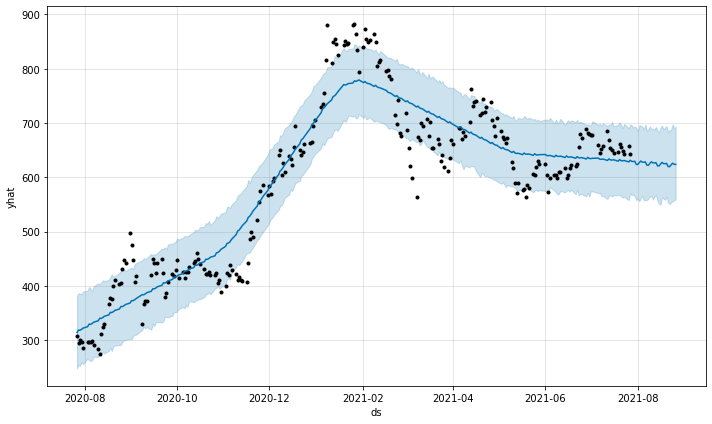

In [27]:
figure= m.plot(forecast, xlabel='ds', ylabel='yhat')

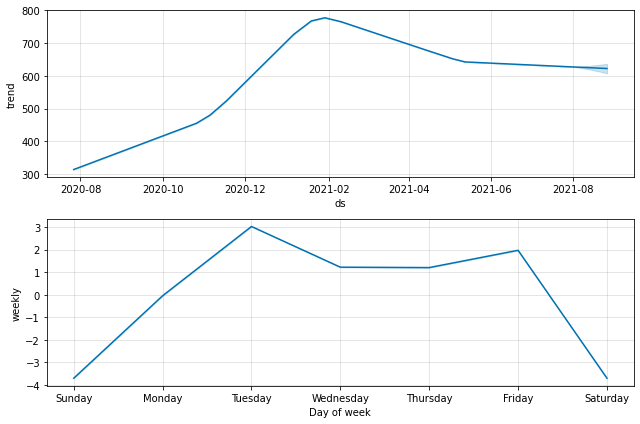

In [28]:
# visualizing trends

figure= m.plot_components(forecast)

# downloading the forecast data

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

***THANK YOU***

***Deepak kumar singh***